In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nba-mvp-voting-stats/test_data_mvp.csv
/kaggle/input/nba-mvp-voting-stats/data_mvp.csv


In [2]:
main_data = pd.read_csv("/kaggle/input/nba-mvp-voting-stats/data_mvp.csv")

In [3]:
pd.set_option('display.max_columns', None)
main_data.head()

,Unnamed: 0,fga,fg3a,fta,per,ts_pct,usg_pct,bpm,season,player,win_pct,votes_first,points_won,points_max,award_share,g,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48
0,0,18.6,0.2,6.5,25.1,0.572,28.4,7.5,1980-81,Julius Erving,0.756098,28.0,454.0,690.0,0.658,82.0,35.0,24.6,8.0,4.4,2.1,1.8,0.521,0.222,0.787,13.8,0.231
1,1,18.3,0.9,4.0,19.9,0.528,24.3,4.3,1980-81,Larry Bird,0.756098,20.0,423.0,690.0,0.613,82.0,39.5,21.2,10.9,5.5,2.0,0.8,0.478,0.270,0.863,10.8,0.160
2,2,18.2,0.0,6.9,25.5,0.616,26.3,6.1,1980-81,Kareem Abdul-Jabbar,0.658537,8.0,286.0,690.0,0.414,80.0,37.2,26.2,10.3,3.4,0.7,2.9,0.574,0.000,0.766,14.3,0.230
3,3,19.3,0.0,10.1,25.1,0.585,27.6,3.3,1980-81,Moses Malone,0.487805,8.0,180.0,690.0,0.261,80.0,40.6,27.8,14.8,1.8,1.0,1.9,0.522,0.333,0.757,13.7,0.202
4,4,21.1,0.4,7.6,22.9,0.555,32.3,2.9,1980-81,George Gervin,0.634146,1.0,83.0,690.0,0.120,82.0,33.7,27.1,5.1,3.2,1.1,0.7,0.492,0.257,0.826,10.5,0.182


In [4]:
col=main_data.columns
col

Index(['Unnamed: 0', 'fga', 'fg3a', 'fta', 'per', 'ts_pct', 'usg_pct', 'bpm',
       'season', 'player', 'win_pct', 'votes_first', 'points_won',
       'points_max', 'award_share', 'g', 'mp_per_g', 'pts_per_g', 'trb_per_g',
       'ast_per_g', 'stl_per_g', 'blk_per_g', 'fg_pct', 'fg3_pct', 'ft_pct',
       'ws', 'ws_per_48'],
      dtype='object')

In [5]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   649 non-null    int64  
 1   fga          649 non-null    float64
 2   fg3a         649 non-null    float64
 3   fta          649 non-null    float64
 4   per          649 non-null    float64
 5   ts_pct       649 non-null    float64
 6   usg_pct      649 non-null    float64
 7   bpm          649 non-null    float64
 8   season       649 non-null    object 
 9   player       649 non-null    object 
 10  win_pct      649 non-null    float64
 11  votes_first  649 non-null    float64
 12  points_won   649 non-null    float64
 13  points_max   649 non-null    float64
 14  award_share  649 non-null    float64
 15  g            649 non-null    float64
 16  mp_per_g     649 non-null    float64
 17  pts_per_g    649 non-null    float64
 18  trb_per_g    649 non-null    float64
 19  ast_per_

Aggregating relevant features into array

In [6]:
OG_features = ['fga', 'fg3a', 'fta', 'per', 'ts_pct', 'usg_pct', 'bpm',
       'mp_per_g', 'pts_per_g', 'trb_per_g', 'ast_per_g',
       'stl_per_g', 'blk_per_g', 'fg_pct', 'fg3_pct', 'ft_pct', 'ws',
       'ws_per_48', 'win_pct']

In [7]:
X= main_data[OG_features]

y = main_data[['award_share']].to_numpy()
y = y.reshape(y.shape[0], )

y=pd.Series(y)

In [8]:
y.head()

0    0.658
1    0.613
2    0.414
3    0.261
4    0.120
dtype: float64

# Feature Set 1

# Univariate Feature Selection using GenericUnivariateSelect

In [9]:
#Univariate feature selection

from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import mutual_info_regression
import seaborn as sns
import matplotlib.pyplot as plt

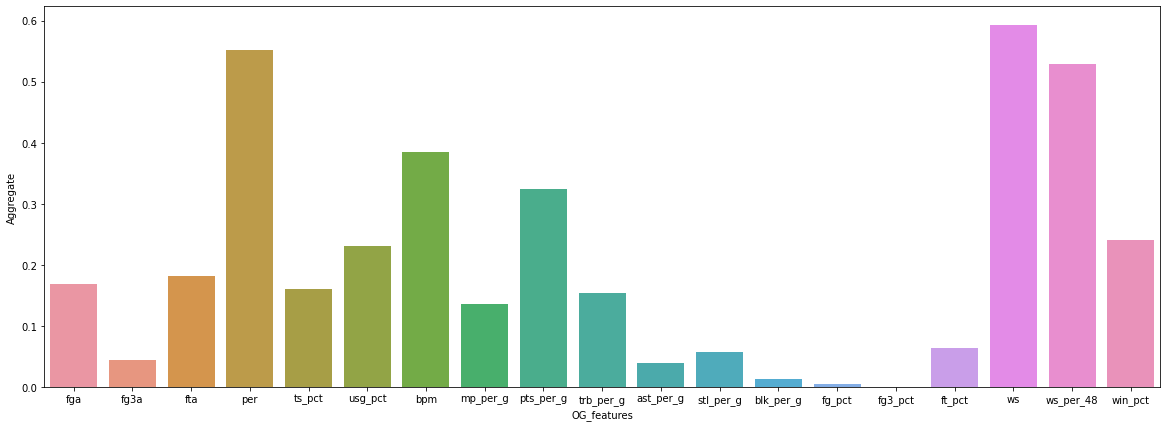

In [10]:
#Select K Best and Select Percentile selction using Generic Univariate Select

Selector_1 = GenericUnivariateSelect(mutual_info_regression,mode="k_best", param=10)
Fit_data = Selector_1.fit_transform(X, y)

Sort_Score_1 = Selector_1.scores_[::]
    
Selector_2 = GenericUnivariateSelect(mutual_info_regression,mode="percentile", param=10)
Fit_data = Selector_2.fit_transform(X, y)

Sort_Score_2 = Selector_2.scores_[::]

scores= list(zip(OG_features,Sort_Score_1,Sort_Score_2))   
 
final_scores= pd.DataFrame(scores, columns = ['OG_features','K_best', 'Percentile'])

final_scores["Aggregate"]=final_scores["K_best"]+final_scores["Percentile"]

plt.figure(figsize=(20,7))
sns.barplot(x="OG_features",y="Aggregate",data=final_scores)


Note:
1. ws, bpm, per,usg_pct,win_pct and pts_per_g are most relevant features as expected
2. Unexpected irrelevancy of ts_pct

# SNS Heatmap

In [11]:
heat_data= main_data[OG_features + ["award_share"]]

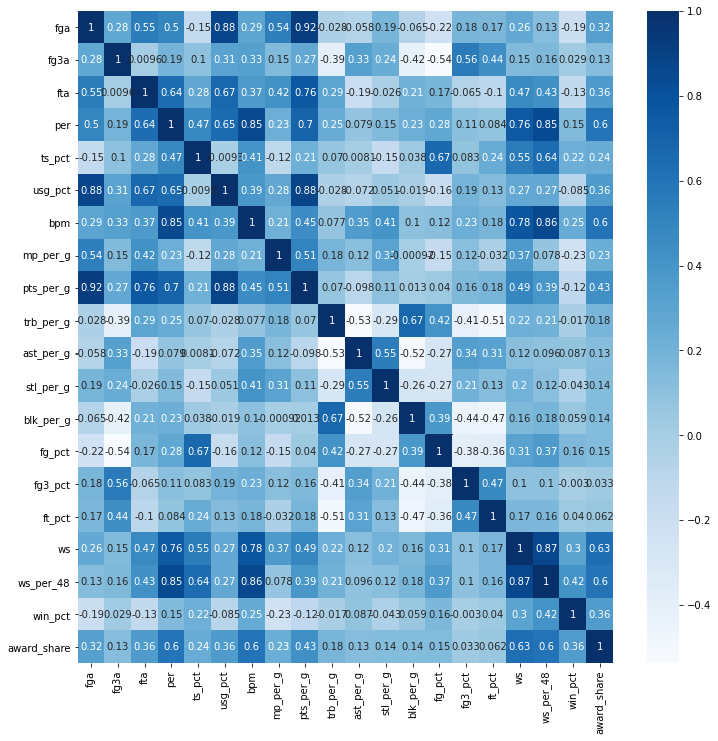

In [12]:
fig = plt.figure(figsize=(12,12))

fig.set_facecolor('white')

sns.heatmap(heat_data.corr(), annot=True, cmap="Blues")

Note:
1. No characteristic anamoly featueres map well to award_share


# Recursive Feature Elimination with Cross Validation

In [13]:
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR

In [14]:
estimator = SVR(kernel="linear")
selector = RFECV(estimator,min_features_to_select=7, step=1)
selector = selector.fit(X, y)

In [15]:
RFE_scores=list(zip(OG_features,selector.ranking_))
final_scores_RFE= pd.DataFrame(RFE_scores, columns = ['OG_features','RFE_'])
final_scores_RFE

,OG_features,RFE_
0,fga,3
1,fg3a,5
2,fta,4
3,per,1
4,ts_pct,1
5,usg_pct,2
6,bpm,1
7,mp_per_g,1
8,pts_per_g,1
9,trb_per_g,1


#  Feature Importance in a real model using XGBoost

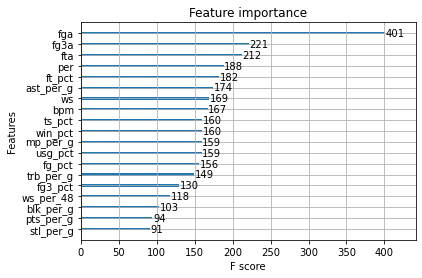

In [16]:
Feature_Imp = XGBRegressor()
Feature_Imp.fit(X, y)

plot_importance(Feature_Imp)
plt.show()

Note:
1. fga,fta and fg3a are assingned more relevance than expected, we can remove them as their effect is duplicated in usg_pct
2. fg_pct,ft_pct and fg3_pct can be removed as their effect is duplicated in ts_pct
3. WS per 48 can be removed since WS are better and that is just scaled value

# Feature Set 2

In [17]:
OG_2_features=[ 'per','ts_pct', 'usg_pct', 'bpm', 'pts_per_g', 'trb_per_g', 'ast_per_g',
       'stl_per_g', 'blk_per_g', 'ws', 'win_pct']

heat_data_2= main_data[OG_2_features + ["award_share"]]

# SNS Heatmap

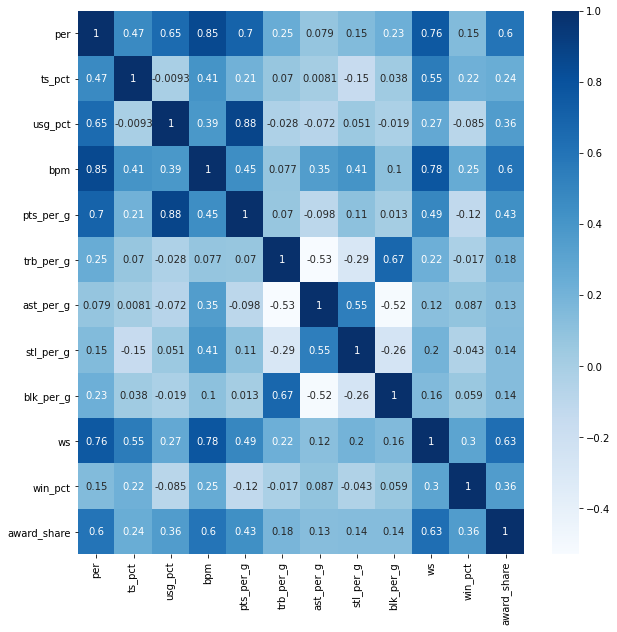

In [18]:
fig = plt.figure(figsize=(10,10))

fig.set_facecolor('white')

sns.heatmap(heat_data_2.corr(), annot=True, cmap="Blues")

# Feature Importance in Real Model with XGBoost

In [19]:
X=main_data[OG_2_features]

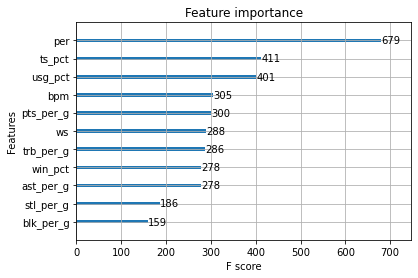

In [20]:
Feature_Imp = XGBRegressor(random_state=21)
Feature_Imp.fit(X, y)

plot_importance(Feature_Imp)
plt.show()

# Recursive Feature Elimination with Cross Validation

In [21]:
estimator = SVR(kernel="linear")
selector = RFECV(estimator,min_features_to_select=3, step=1)
selector = selector.fit(X, y)

In [22]:
RFE_scores=list(zip(OG_2_features,selector.ranking_))
final_scores_RFE= pd.DataFrame(RFE_scores, columns = ['OG_2_features','RFE_'])
final_scores_RFE

,OG_2_features,RFE_
0,per,1
1,ts_pct,1
2,usg_pct,1
3,bpm,1
4,pts_per_g,1
5,trb_per_g,1
6,ast_per_g,1
7,stl_per_g,1
8,blk_per_g,1
9,ws,1


# Final Feature Review using Generic Univariate Select

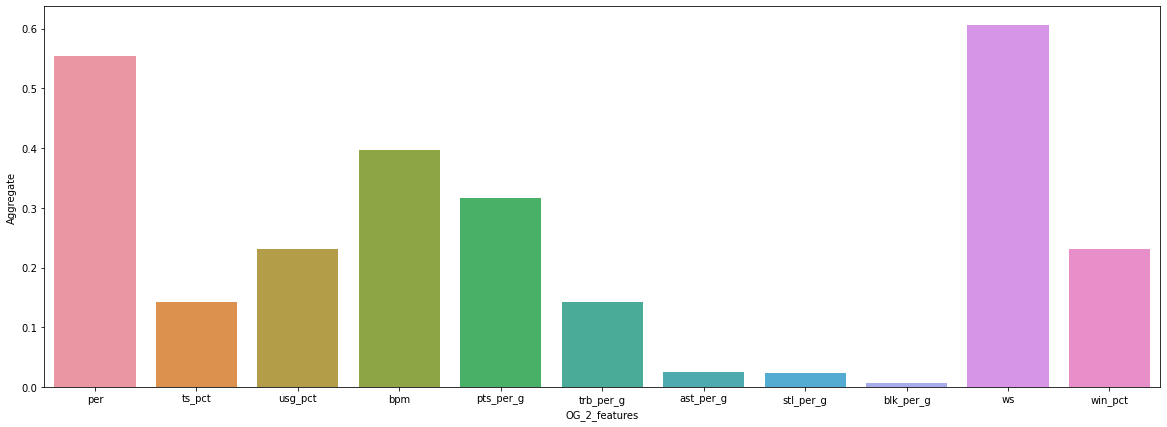

In [23]:
#Select K Best and Select Percentile selction using Generic Univariate Select

Selector_1 = GenericUnivariateSelect(mutual_info_regression,mode="k_best", param=10)
Fit_data = Selector_1.fit_transform(X, y)

Sort_Score_1 = Selector_1.scores_[::]
    
Selector_2 = GenericUnivariateSelect(mutual_info_regression,mode="percentile", param=10)
Fit_data = Selector_2.fit_transform(X, y)

Sort_Score_2 = Selector_2.scores_[::]

scores= list(zip(OG_2_features,Sort_Score_1,Sort_Score_2))   
 
final_scores= pd.DataFrame(scores, columns = ['OG_2_features','K_best', 'Percentile'])

final_scores["Aggregate"]=final_scores["K_best"]+final_scores["Percentile"]

plt.figure(figsize=(20,7))
sns.barplot(x="OG_2_features",y="Aggregate",data=final_scores)


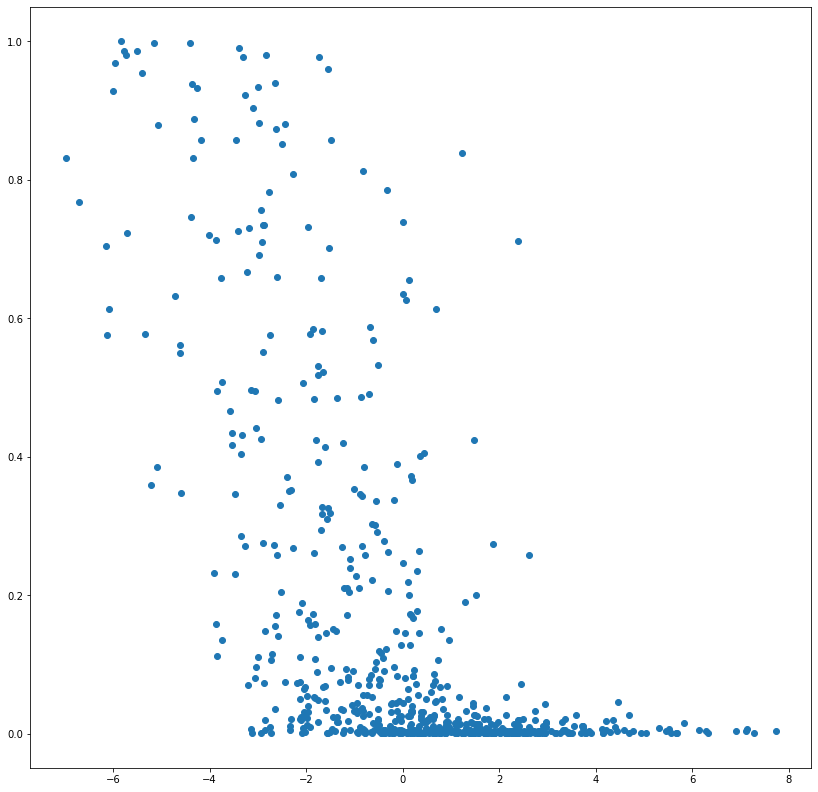

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_x = main_data[OG_features]

scaler = StandardScaler()
transformed = scaler.fit_transform(X_x)
pca = PCA(n_components=1)
decomposed = pca.fit_transform(transformed)
plt.figure(figsize=(14, 14))
plt.scatter(decomposed, main_data.award_share)



Linear regression alogorithms will not fit well.

In [25]:
test_data=pd.read_csv("/kaggle/input/nba-mvp-voting-stats/test_data_mvp.csv")
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 42 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    10 non-null     int64  
 1   fga           10 non-null     float64
 2   fg3a          10 non-null     float64
 3   fta           10 non-null     float64
 4   per           10 non-null     float64
 5   ts_pct        10 non-null     float64
 6   usg_pct       10 non-null     float64
 7   bpm           10 non-null     float64
 8   ws            10 non-null     float64
 9   season        10 non-null     object 
 10  player        10 non-null     object 
 11  win_pct       10 non-null     float64
 12  wins          10 non-null     int64  
 13  losses        10 non-null     int64  
 14  win_loss_pct  10 non-null     float64
 15  g             10 non-null     int64  
 16  gs            10 non-null     int64  
 17  mp_per_g      10 non-null     float64
 18  fg_per_g      10 non-null     flo

In [26]:
X_test=test_data[OG_2_features].copy()

In [27]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   per        10 non-null     float64
 1   ts_pct     10 non-null     float64
 2   usg_pct    10 non-null     float64
 3   bpm        10 non-null     float64
 4   pts_per_g  10 non-null     float64
 5   trb_per_g  10 non-null     float64
 6   ast_per_g  10 non-null     float64
 7   stl_per_g  10 non-null     float64
 8   blk_per_g  10 non-null     float64
 9   ws         10 non-null     float64
 10  win_pct    10 non-null     float64
dtypes: float64(11)
memory usage: 1008.0 bytes


In [28]:
from xgboost import XGBRegressor

In [29]:
benchmark_model=XGBRegressor()
benchmark_model.fit(X,y)
benchmark_rank=benchmark_model.predict(X_test)
benchmark_rank

array([ 0.36993128,  0.41558632,  0.4415384 ,  0.30769086,  0.15048382,
        0.22575739,  0.09930605,  0.01828781, -0.00618064,  0.09330001],
      dtype=float32)

In [30]:
names=test_data["player"].copy()
names=names.to_numpy()
Prediction_Basketball_Reference=test_data["value"].copy()
Prediction_Basketball_Reference=Prediction_Basketball_Reference.to_numpy()

In [31]:
results= list(zip(names,Prediction_Basketball_Reference,benchmark_rank))
result_df=pd.DataFrame(results,columns=["Name","Prediction_Basketball_Reference","Naive_Benchmark_Prediction"])
result_df["Naive_Benchmark_Prediction"]=result_df["Naive_Benchmark_Prediction"]*100
#result_df["Difference"]=result_df["Benchmark_Prediction"]-result_df["Prediction_Basketball_Reference"]
result_df

,Name,Prediction_Basketball_Reference,Naive_Benchmark_Prediction
0,Giannis Antetokounmpo,50.7%,36.993128
1,LeBron James,17.3%,41.558632
2,James Harden,10.5%,44.153839
3,Anthony Davis,9.8%,30.769086
4,Luka Dončić,4.0%,15.048382
5,Kawhi Leonard,2.1%,22.575739
6,Nikola Jokić,1.8%,9.930605
7,Khris Middleton,1.5%,1.828781
8,Kyle Lowry,1.1%,-0.618064
9,Jimmy Butler,1.1%,9.330001


In [32]:
sum=result_df["Naive_Benchmark_Prediction"].sum()
Naive_Benchmark_Prediction=result_df["Naive_Benchmark_Prediction"].copy().to_numpy()
result_df["Percentage_Prediction"]=0

for index,award_share in enumerate(Naive_Benchmark_Prediction):
    result_df.iloc[index,3]=(award_share/sum)*100

result_df

,Name,Prediction_Basketball_Reference,Naive_Benchmark_Prediction,Percentage_Prediction
0,Giannis Antetokounmpo,50.7%,36.993128,17.485043
1,LeBron James,17.3%,41.558632,19.642958
2,James Harden,10.5%,44.153839,20.869600
3,Anthony Davis,9.8%,30.769086,14.543209
4,Luka Dončić,4.0%,15.048382,7.112716
5,Kawhi Leonard,2.1%,22.575739,10.670570
6,Nikola Jokić,1.8%,9.930605,4.693765
7,Khris Middleton,1.5%,1.828781,0.864385
8,Kyle Lowry,1.1%,-0.618064,-0.292132
9,Jimmy Butler,1.1%,9.330001,4.409886


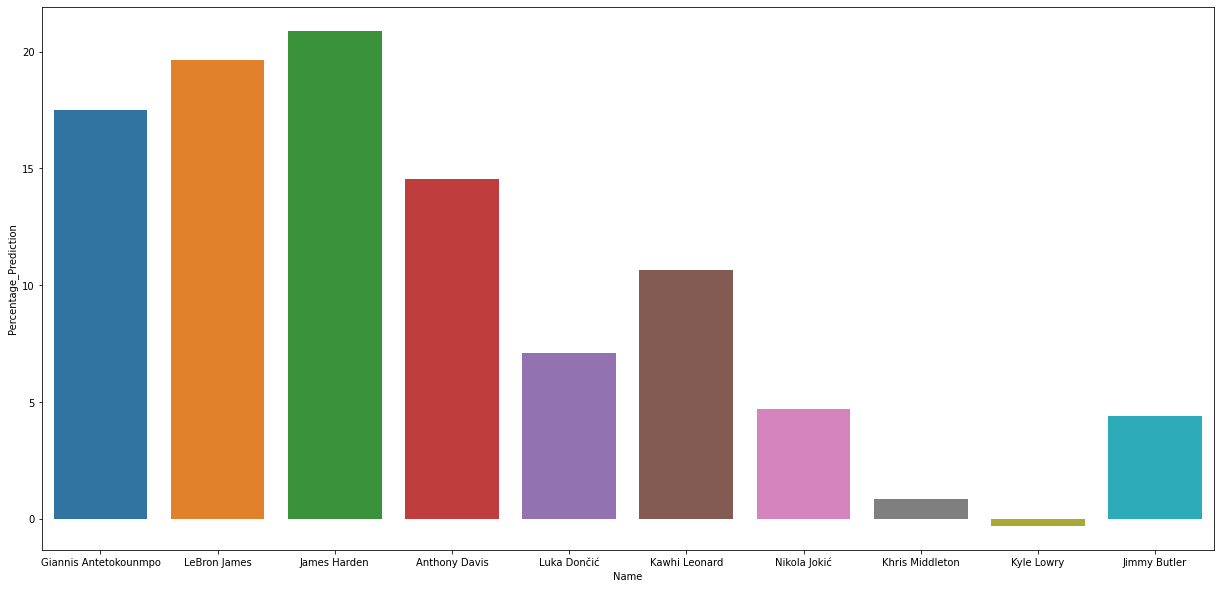

In [33]:
plt.figure(figsize=(21,10))
sns.barplot(x="Name",y="Percentage_Prediction",data=result_df)
plt.show()

Even though sentimentally Giannis is en route to be the MVP it is undeniable that James Harden is having a historically high statistical season yet again.

Note:
* NBA award share is calculated as ratio of vote points recieved to maximum vote points possible
  